# A trivial example
Estimate the mean and variance of a normal distribution

In [1]:
# packages
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

In [2]:
# generate observation data
data = np.random.normal(loc = 0, scale = 1, size = 1000)

In [3]:
# sufficient statistics of normal distribution
def norm_sumstat(dat):
    s1 = np.mean(data)
    s2 = np.var(data)
    return np.array([s1, s2])

In [4]:
norm_sumstat(data)

array([0.05053094, 0.94285839])

In [30]:
# simulator
def norm_sim(a, b):
    data = np.random.normal(loc = a, scale = b, size = 1000)
    #data = norm_sumstat(data)
    data = np.sort(data)
    return data

In [33]:
with pm.Model() as example:
    a = pm.Normal('a', mu = 10, sd = 10)
    b = pm.HalfNormal('b', sd = 5)
    s = pm.Simulator('s', norm_sim, observed=np.sort(data))
    trace_example = pm.sample_smc(kernel='ABC', n_steps = 25, epsilon=0.1, parallel = True, sum_stat=True)

Sample initial stage: ...
/home/robin/anaconda3/lib/python3.7/site-packages/pymc3/smc/smc.py:120: UserWarning: Warning: SMC-ABC methods are experimental step methods and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)
Stage:   0 Beta: 0.000 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.002 Steps:  25 Acce: 0.500


ValueError: 'p' must be 1-dimensional

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2f829c8d0>,
      dtype=object)

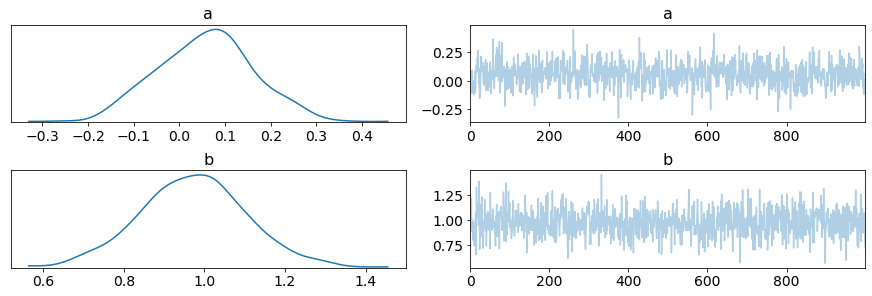

In [32]:
az.plot_trace(trace_example)